In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve,r2_score
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.shape

(7043, 21)

In [8]:
df.size

147903

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Check if there are any misssing values in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
# check rows with missing values
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [36]:
# Here the missing values are 11 only in Total charges column so we can drop these rows
df=df.dropna()

In [37]:
df.shape

(7032, 21)

In [38]:
#check if there are any duplicated records
df.duplicated().sum()

0

In [39]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [40]:
#Remove the trailing and leading spaces in the object type columns
for i in df.select_dtypes('object').columns:
    df[i]=df[i].str.strip()

In [41]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [42]:
# Convet Total Charges column to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [43]:
#check are there any garbage values
garbage_like = ['na', 'n/a', 'null', 'none', 'missing', '?', '???', '-', '--', '0', '000', 'unknown', 'nan']

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    print(f"\n Inspecting column: {col}")
    vc = df[col].value_counts()
    print(vc.head(10))  # show top 10 values

    # Check for potential garbage values
    suspicious = df[col].isin(garbage_like)
    if suspicious.any():
        print(f"Garbage-like values in '{col}':")
        print(df[col][suspicious].value_counts())
    print("="*50)



 Inspecting column: customerID
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
5855-EIBDE    1
8166-ZZTFS    1
0129-KPTWJ    1
9128-CPXKI    1
Name: count, dtype: int64

 Inspecting column: gender
gender
Male      3549
Female    3483
Name: count, dtype: int64

 Inspecting column: Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64

 Inspecting column: Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

 Inspecting column: PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

 Inspecting column: MultipleLines
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

 Inspecting column: InternetService
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

 Inspecting column: OnlineSecurity
OnlineSecurity
No                     3497
Yes                    2015
No inte

In [44]:
# No Garbage values found

In [47]:
# delete the customerID column
df.drop('customerID', axis=1, inplace=True)

In [48]:
df.duplicated().sum()

22

In [49]:
# delete duplicates
df.drop_duplicates(inplace=True)

In [53]:
# check the target column
(df['Churn'].value_counts(normalize=True) * 100).round(2)

Churn
No     73.51
Yes    26.49
Name: proportion, dtype: float64

In [52]:
#In the target column data is imbalanced(73.51% No, 26.49% Yes)

In [55]:
# Encode Categorical Columns
# Label Encode object columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [56]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [58]:
# Feature Engineering 
# Create average monthly spend
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)  # +1 to avoid div by 0

# Bin tenure into groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,60,72], labels=[0,1,2,3,4])

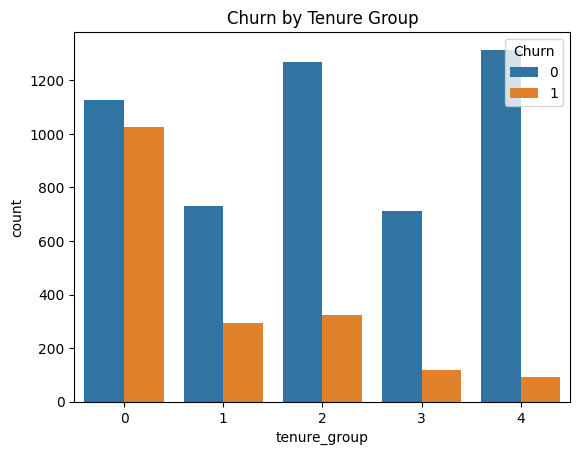

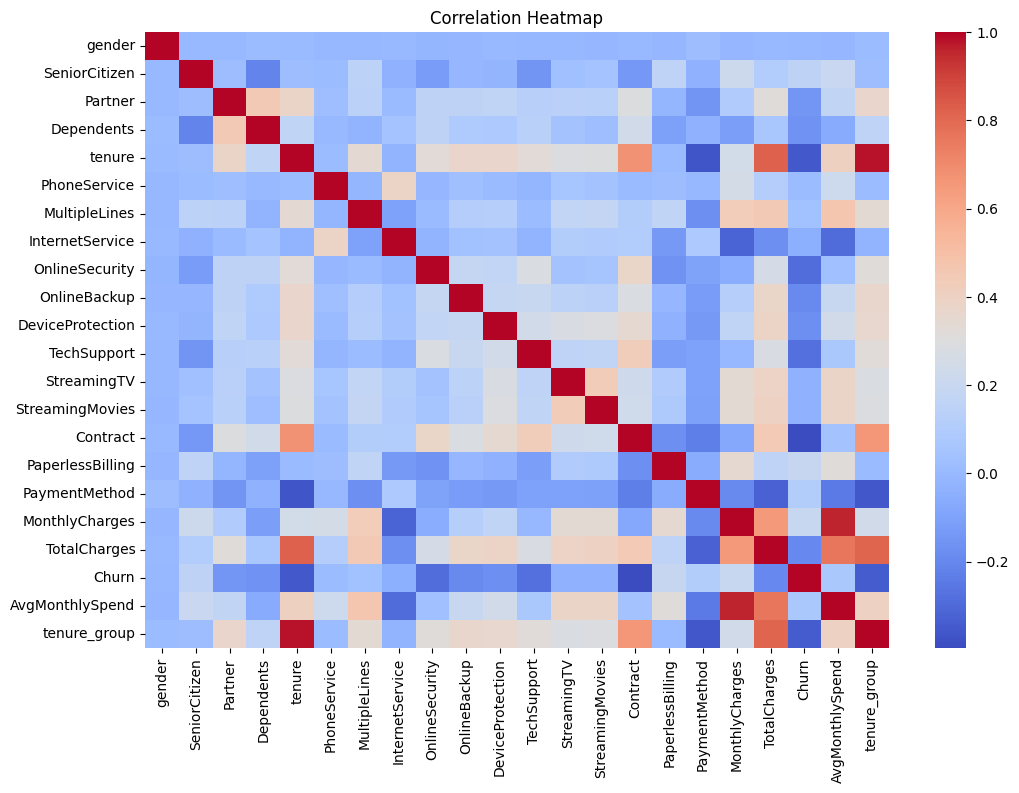

In [59]:
# Exploratory Data Analysis 
# Plot churn by tenure group
sns.countplot(data=df,x='tenure_group', hue='Churn')
plt.title("Churn by Tenure Group")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [60]:
# Preprocessing for Modeling

# Define features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split into train/test BEFORE scaling (to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Convert back to DataFrame to preserve column names (needed for feature importance plots)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

Accuracy: 0.8045649072753209


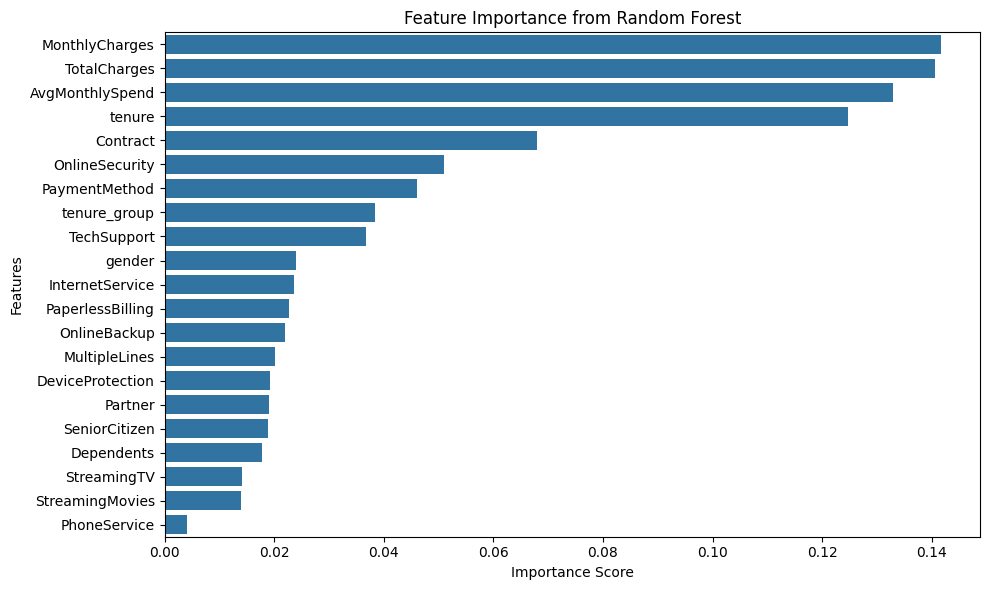

In [61]:
# Train Random Forest Model
# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions 
y_pred = rf.predict(X_test)

# Evaluate 
print("Accuracy:", accuracy_score(y_test, y_pred))


# Feature Importance
importances = rf.feature_importances_
features = X.columns  # Make sure you're using the original column names
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

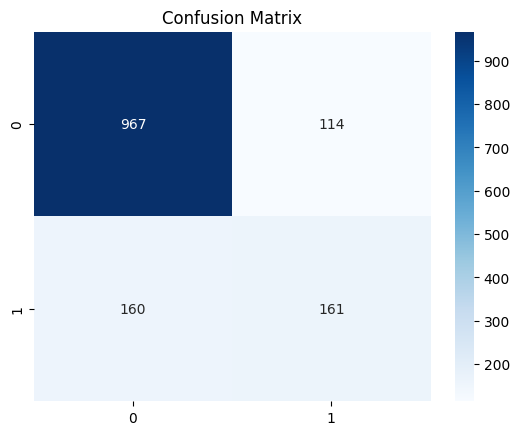

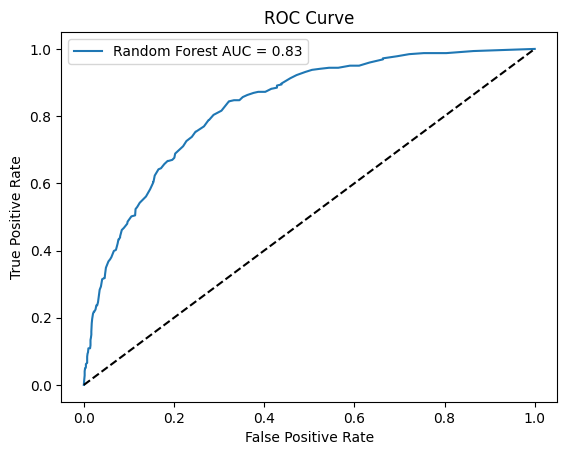

In [65]:
# Plot Confusion Matrix & ROC Curve
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(fpr, tpr, label=f"Random Forest AUC = {roc_auc_score(y_test, rf_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [79]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Show best parameters
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.7951098856540426


In [80]:
#Final Model Evaluation
best_rf = grid_search.best_estimator_
final_preds = best_rf.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, final_preds))
print("Final Classification Report:\n", classification_report(y_test, final_preds))

Final Accuracy: 0.8216833095577746
Final Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1081
           1       0.63      0.53      0.58       321

    accuracy                           0.82      1402
   macro avg       0.75      0.72      0.73      1402
weighted avg       0.81      0.82      0.82      1402



In [66]:
#using XGBoost

In [83]:
#XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_hat=model.predict(X_test)

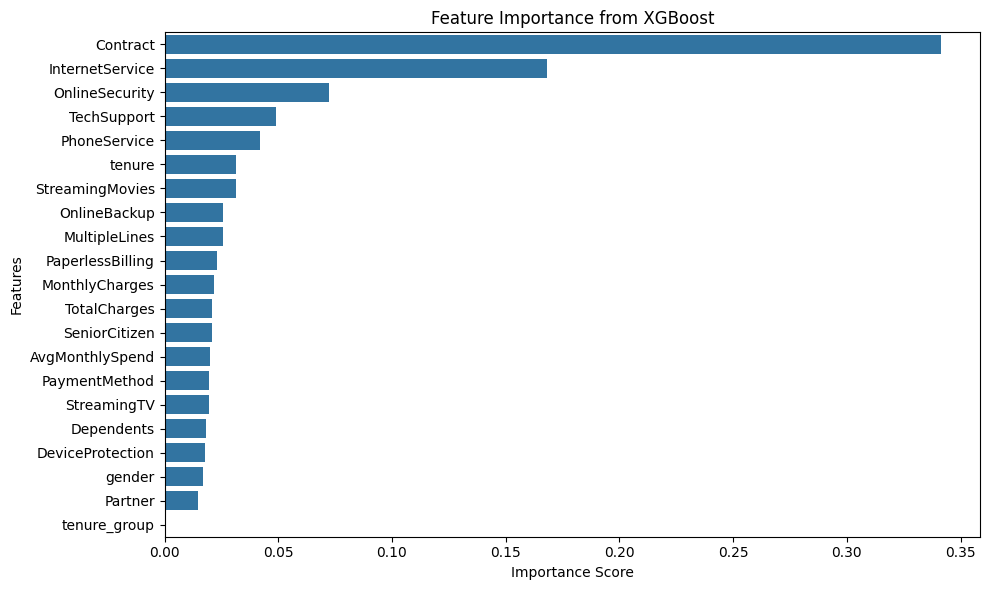

In [73]:
# Feature Importance
importances2 = model.feature_importances_
features2 = X.columns  # Make sure you're using the original column names
feat_importance2 = pd.Series(importances2, index=features2).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance2, y=feat_importance2.index)
plt.title("Feature Importance from XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

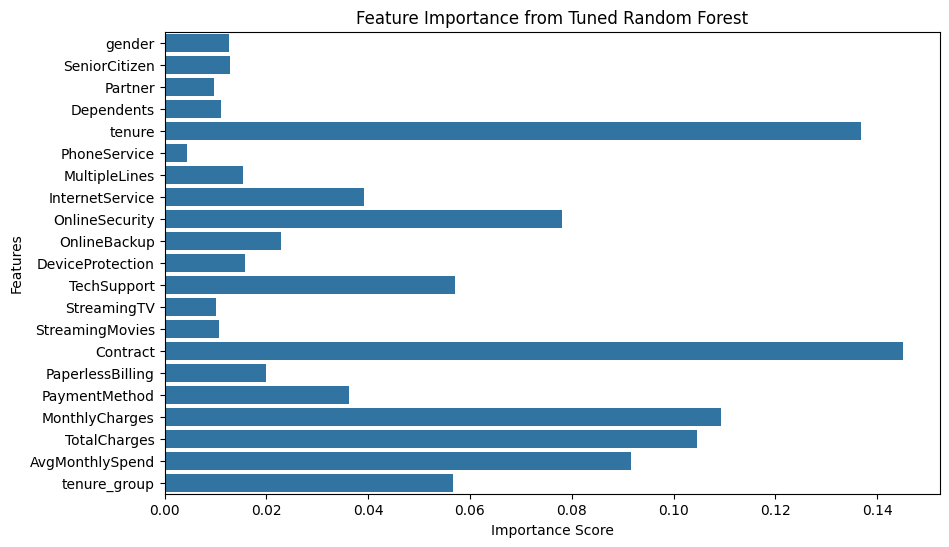

In [81]:
# Final Feature Importance Plot
importances = best_rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.2],
    'min_child_weight': [1, 5]
}
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,             # Number of combinations to try
    scoring='accuracy',    # or 'roc_auc', 'f1', etc.
    cv=3,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

In [74]:
# Train LightGBM model
model2 = LGBMClassifier()
model2.fit(X_train, y_train)

# Predict
y_hat2 = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_hat2))


[LightGBM] [Info] Number of positive: 1536, number of negative: 4072
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 5608, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273894 -> initscore=-0.974953
[LightGBM] [Info] Start training from score -0.974953
Accuracy: 0.7981455064194009


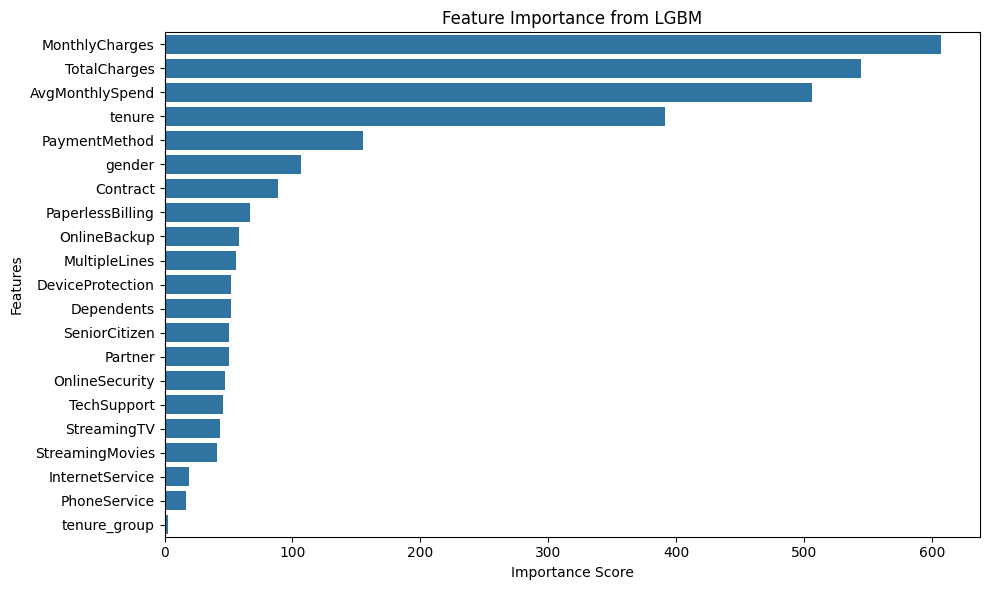

In [75]:
# Feature Importance
importances3 = model2.feature_importances_
features3 = X.columns  # Make sure you're using the original column names
feat_importance3 = pd.Series(importances3, index=features3).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance3, y=feat_importance3.index)
plt.title("Feature Importance from LGBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

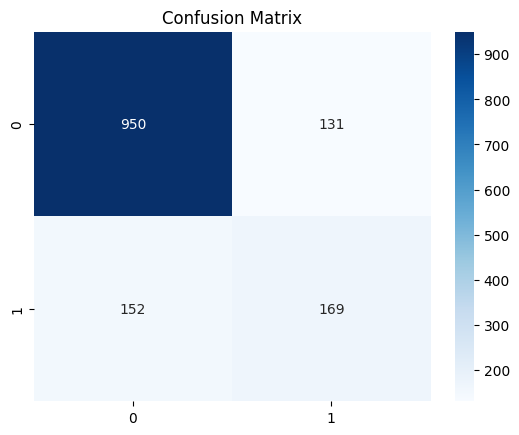

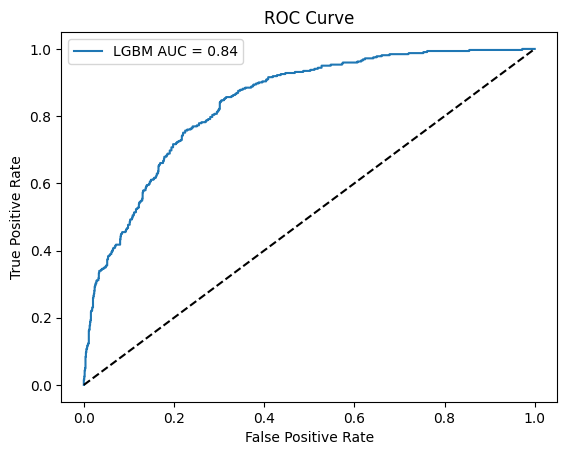

In [78]:
# Plot Confusion Matrix & ROC Curve
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_hat2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
LGBM_probs = model2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, LGBM_probs)

plt.plot(fpr, tpr, label=f"LGBM AUC = {roc_auc_score(y_test, LGBM_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()